In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt


In [2]:
data = pd.read_table('onlyhash.data',names=["user_name","date","hashtag"])

In [3]:
data["hashtag_list"] = data.hashtag.apply(lambda x: x.split(" "))

In [4]:
users = data.user_name.unique()
index = [i for i in range(1, len(users)+1)]

dates = data.date.unique()
index2 = [i for i in range(1, len(dates)+1)]

In [5]:
df = pd.DataFrame(users, index=index, columns=['user'])

In [10]:
def get_hash(user_name, dataframe):
    dataframe = dataframe[dataframe["user_name"] == user_name]
    hashtag_list = dataframe["hashtag_list"].values
    hashtag_list = [value for sublist in hashtag_list for value in sublist]
    return hashtag_list

In [11]:
df["hashtags"] = df.user.apply(lambda x: get_hash(x, data))

In [14]:
def entropy(counter_list):
    c = Counter(counter_list)
    ent = 0.0
    for k,v in c.items():
        prob = float(v)/len(counter_list)
        ent = ent - prob * math.log2(prob)
    return ent

In [15]:
df["user_entropy"] = df.hashtags.apply(lambda x: entropy(x))

In [16]:
data["entropy"] = data.hashtag_list.apply(lambda x: entropy(x))

In [17]:
grp = data.groupby(["date"]).entropy.mean()
user_entropy_by_day = grp.to_frame()

In [18]:
df2 = pd.DataFrame(dates, index=index2, columns=['date'])

In [19]:
def get_hash_date(date, dataframe):
    dataframe = dataframe[dataframe["date"] == date]
    hashtag_list = dataframe["hashtag_list"].values
    list_hash = [val for sublist in hashtag_list for val in sublist]
    return list_hash

In [20]:
df2["hashtags"] = df2.date.apply(lambda x: get_hash_date(x, data))

In [21]:
df2["sys_entropy"] = df2.hashtags.apply(lambda x: entropy(x))

In [22]:
user_entropy_by_day['date'] = user_entropy_by_day.index

In [24]:
entropy_df = pd.merge(df2, user_entropy_by_day, on='date', how='outer')


In [25]:
sorted = entropy_df.sort_values(by="sys_entropy")

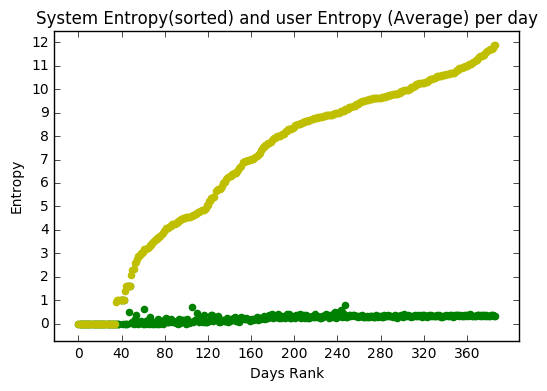

In [30]:
import matplotlib.pyplot as plt
length=len(sorted)
x = [x for x in range(0,length)]
plt.title("System Entropy(sorted) and user Entropy (Average) per day")
plt.xticks(np.arange(0,max(x),40))
plt.yticks(range(0,int(max(sorted.sys_entropy)+2)))
plt.xlabel("Days Rank")
plt.ylabel("Entropy")
plt.scatter(x,sorted.entropy.values,label='User Entropy',color="g")
plt.scatter(x,sorted.sys_entropy.values,label='System Entropy',color="y")
plt.show()